# Tech Job Market and Salaries Analysis 

For our final project, we have selected the Stack Overflow Developer Survey dataset, 
which contains detailed responses from developers regarding their job roles, skills, 
technologies used, and salary information. This dataset is particularly relevant to the 
tech industry, which is a major focus of our group, and will provide insights into the tech 
job market by collecting responses from developers worldwide. It covers various topics 
such as job roles, salary, coding activities, education, technology usage, and job 
satisfaction.<br>

Team Eyy<br>
Members:  
- Julianne Kristine D. Aban 
- Derich Andre G. Arcilla 
- Jennifer Bendoy 
- Richelle Ann C. Candidato 
- Marc Francis B. Gomolon 
- Phoebe Kae A. Plasus

##### Data Preparation

In [ ]:
# place code here

##### Exploratory Data Analysis (EDA)

In [ ]:
# place code here

##### Data Analysis Techniques

In [ ]:
# K-means Clustering

In [8]:
# Linear Regression


Missing values in each column:
YearsCodePro        0
YearsCode           0
EdLevel             0
JobSat          36311
DevType          5992
Salary          31697
dtype: int64

Columns in the DataFrame:
['ResponseId', 'MainBranch', 'Age', 'Employment', 'EdLevel', 'LearnCode', 'LearnCodeOnline', 'DevType', 'OrgSize', 'YearsCode', 'YearsCodePro', 'Country', 'Currency', 'Salary', 'LanguageHaveWorkedWith', 'DatabaseHaveWorkedWith', 'PlatformHaveWorkedWith', 'Unnamed: 17', 'WebframeHaveWorkedWith', 'MiscTechHaveWorkedWith', 'ToolsTechHaveWorkedWith', 'JobSat']

Mean Squared Error: 3.9729677572838805e+292
R-squared: -1.7759166764263913e+166

Feature Importance (Coefficients):
                                              Feature    Coefficient
27                 cat__DevType_Developer, full-stack  1.349229e+146
6                                    cat__EdLevel_3.0  9.927383e+145
9                                    cat__EdLevel_6.0  6.385426e+145
41  cat__DevType_Senior Executive (C-Suite, V

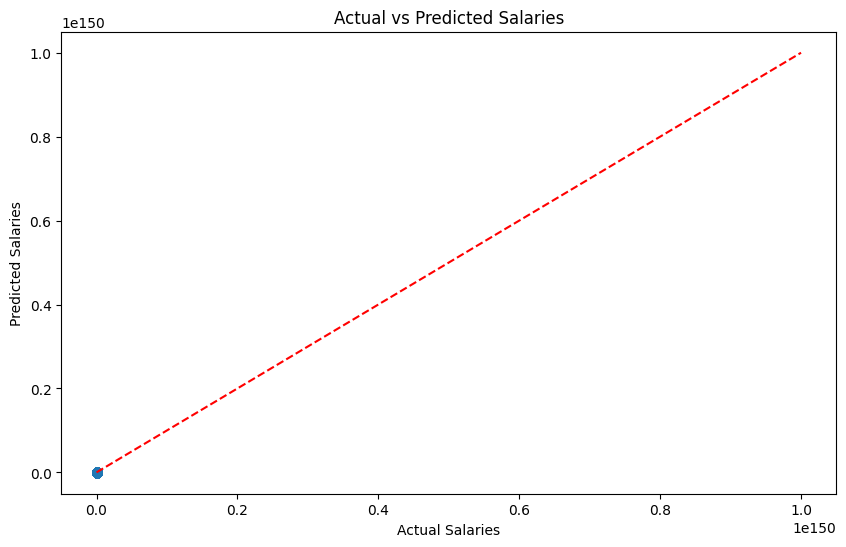

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('cleaned_file.csv')

print("Missing values in each column:")
print(df[['YearsCodePro', 'YearsCode', 'EdLevel', 'JobSat', 'DevType', 'Salary']].isnull().sum())

df = df.dropna(subset=['YearsCodePro', 'YearsCode', 'EdLevel', 'JobSat', 'DevType', 'Salary'])

print("\nColumns in the DataFrame:")
print(df.columns.tolist())

df.columns = df.columns.str.strip()

if 'Salary' not in df.columns:
    print("The column 'Salary' is not available in the DataFrame. Please check the column names.")
else:
    X = df[['YearsCodePro', 'YearsCode', 'EdLevel', 'JobSat', 'DevType']]  
    y = df['Salary']  

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    preprocessor = ColumnTransformer(
        transformers=[ 
            ('num', 'passthrough', ['YearsCodePro', 'YearsCode', 'JobSat']),  
            ('cat', OneHotEncoder(), ['EdLevel', 'DevType'])  
        ])

    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('model', LinearRegression())])

    pipeline.fit(X_train, y_train)

    y_pred = pipeline.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'\nMean Squared Error: {mse}')
    print(f'R-squared: {r2}')

    feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()
    coefficients = pipeline.named_steps['model'].coef_

    feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
    print("\nFeature Importance (Coefficients):")
    print(feature_importance.sort_values(by='Coefficient', ascending=False))

    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred)
    plt.xlabel('Actual Salaries')
    plt.ylabel('Predicted Salaries')
    plt.title('Actual vs Predicted Salaries')
    plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')  
    plt.show()


In [ ]:
# Apriori Algorithm